In [1]:
import pydataset
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df = pydataset.data('Boston')

In [3]:
df.shape

(506, 14)

In [4]:
out=[]
def outlier(a):
    q1 = a.quantile(0.25)
    q3 = a.quantile(0.75)
    iqr = q3-q1
    innerfence = q1-(1.5*iqr)
    outerfence = q3+(1.5*iqr)
    for i in a:
        if i<innerfence or i>outerfence:
            out.append(i)
    print(out)        

In [5]:
outlier(df.medv)

[38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0, 50.0, 42.3, 48.5, 50.0, 44.8, 50.0, 37.6, 46.7, 41.7, 48.3, 42.8, 44.0, 50.0, 43.1, 48.8, 50.0, 43.5, 45.4, 46.0, 50.0, 37.3, 50.0, 50.0, 50.0, 50.0, 50.0, 5.0, 5.0]


In [6]:
len(out)

40

In [7]:
dfnew = df[~(df['medv'].isin(out))]

In [8]:
dfnew.shape

(466, 14)

In [9]:
dfnew = dfnew.reset_index()

In [10]:
train_list = dfnew.sample(frac=0.7).index

In [11]:
len(train_list)

326

In [12]:
0.7*466

326.2

In [13]:
test_list = []
for i in range(0,466):
    if i not in train_list:
        test_list.append(i)

In [14]:
train_list

Int64Index([451, 201,  40,   3,  41, 295, 344, 306, 207, 348,
            ...
            118, 429,  43, 283,  27, 225, 250, 417,  16, 226],
           dtype='int64', length=326)

In [15]:
test_list

[1,
 6,
 7,
 13,
 19,
 20,
 28,
 29,
 30,
 31,
 35,
 44,
 45,
 46,
 51,
 57,
 61,
 62,
 66,
 69,
 71,
 72,
 81,
 84,
 85,
 88,
 96,
 97,
 100,
 101,
 108,
 115,
 119,
 122,
 143,
 144,
 148,
 150,
 153,
 155,
 158,
 160,
 163,
 166,
 169,
 170,
 173,
 177,
 181,
 184,
 185,
 186,
 189,
 190,
 195,
 197,
 203,
 204,
 206,
 208,
 209,
 214,
 215,
 218,
 220,
 223,
 232,
 233,
 234,
 235,
 242,
 251,
 252,
 253,
 254,
 255,
 275,
 277,
 278,
 280,
 284,
 287,
 288,
 289,
 290,
 291,
 294,
 297,
 298,
 317,
 323,
 324,
 328,
 330,
 333,
 334,
 337,
 339,
 340,
 346,
 349,
 351,
 355,
 362,
 367,
 371,
 372,
 375,
 378,
 383,
 385,
 386,
 393,
 394,
 397,
 399,
 402,
 403,
 406,
 414,
 416,
 418,
 420,
 421,
 422,
 424,
 430,
 432,
 433,
 435,
 437,
 439,
 441,
 446,
 447,
 449,
 454,
 456,
 461,
 462]

In [16]:
dfnew.head()

,index,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
len(train_list),len(test_list)

(326, 140)

In [18]:
traindata = dfnew.iloc[train_list]

In [19]:
testdata = dfnew.iloc[test_list]

In [20]:
traindata.shape, testdata.shape

((326, 15), (140, 15))

In [21]:
traindata.columns

Index(['index', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [22]:
X = traindata[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'black', 'lstat']]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
scale_data = sc.fit_transform(X)

In [26]:
scale_data = pd.DataFrame(data=scale_data, columns=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'black', 'lstat'])

In [27]:
scale_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.400181,-0.504759,2.383329,-0.241747,0.484912,-0.328481,1.092664,-0.930990,-0.618420,1.835874,0.709414,0.354222,0.658081
1,-0.404461,-0.504759,0.369158,-0.241747,-0.024218,0.809891,0.615999,-0.223210,-0.500866,-0.800320,-1.128814,0.385181,-0.508570
2,-0.408853,2.883396,-1.221818,-0.241747,-1.076994,1.469767,-1.795166,0.679175,-0.735974,-0.945765,-0.184859,0.418112,-1.581945
3,-0.409000,-0.504759,-1.333798,-0.241747,-0.818115,1.424854,-0.751372,0.980471,-0.735974,-1.127572,0.013868,0.406632,-1.448295
4,-0.397573,-0.504759,-0.645926,-0.241747,-0.904408,1.031002,-2.243997,0.824923,-0.735974,-1.060910,-0.383586,0.299724,-1.183780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-0.389264,0.489100,-0.798624,-0.241747,-1.051106,0.091283,0.410719,1.888917,-0.265758,-0.473069,0.212596,0.192237,-0.444530
322,-0.387605,0.398749,-1.166556,-0.241747,-0.948417,1.103553,-1.224558,0.086517,-0.500866,-1.163933,-1.874041,0.432953,-1.182388
323,0.572732,-0.504759,0.981408,-0.241747,1.382361,-0.409670,0.448991,-0.515756,1.732658,1.563164,0.759096,-4.128606,0.500764
324,-0.286219,-0.504759,-0.467050,-0.241747,-0.127769,-0.411397,-1.325458,0.267860,-0.618420,-0.612454,1.156550,0.316421,-0.941540


In [28]:
pc = PCA()
pc = pc.fit(scale_data)

In [29]:
#scale_data.head()

In [30]:
#pc.explained_variance_ratio_

In [31]:
pc_x = pc.fit_transform(scale_data)

In [32]:
#pc_x.head()

In [33]:
#pc.explained_variance_ratio_.cumsum()

In [34]:
pc_x = pd.DataFrame(data=pc_x, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

In [35]:
pc_x['medv'] = traindata['medv'].values

In [36]:
pc_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,medv
0,2.441531,-0.891818,-0.344564,0.746130,-0.422024,0.681056,-1.297584,-0.086597,1.092889,-0.832221,-0.126619,0.790734,1.038609,13.6
1,-0.592256,-0.991745,0.655951,0.044356,-1.332147,0.254683,0.369575,-0.066936,0.112509,-0.338008,-0.342090,0.338361,-0.407376,28.7
2,-3.891400,1.650305,0.422180,-0.014855,-0.082539,0.570135,-0.476710,-0.613288,0.927700,0.565020,0.921488,-0.400426,-0.120659,34.9
3,-2.686402,0.226534,0.141326,1.164756,-0.648365,-0.357940,0.918549,0.181733,-0.401821,0.038991,-0.506745,-0.266332,0.020907,33.4
4,-2.779892,0.344030,-0.008426,0.659139,-0.405378,-0.438322,0.667904,1.307700,0.225418,-0.654794,0.092579,-0.713709,-0.009996,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-1.751937,0.449094,-0.687326,0.110078,0.385523,-0.233246,-0.165996,-0.733932,-0.586264,-0.067778,-1.117359,0.596510,-0.183476,20.5
322,-2.910875,0.045634,0.798586,-0.544229,-1.026290,0.247536,0.790382,0.613683,-0.208117,-0.106317,0.624318,0.045092,-0.290751,35.1
323,3.649781,2.211898,0.669621,-0.571487,-0.549563,-2.569946,-0.966560,0.540922,-0.050704,0.532770,-0.233861,-0.040157,-0.064318,13.5
324,-1.122008,-0.066224,-1.017978,1.066223,0.338911,-0.476678,0.271653,0.906402,0.477150,0.548078,-0.008665,-0.692064,0.168169,23.1


In [37]:
#pc_x.corr()

In [38]:
import seaborn as sns

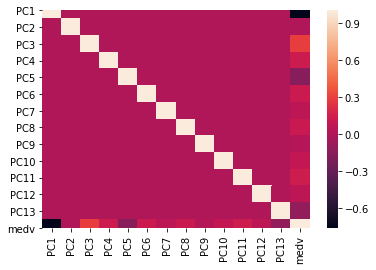

In [39]:
sns.heatmap(pc_x.corr())

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
scale_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.400181,-0.504759,2.383329,-0.241747,0.484912,-0.328481,1.092664,-0.930990,-0.618420,1.835874,0.709414,0.354222,0.658081
1,-0.404461,-0.504759,0.369158,-0.241747,-0.024218,0.809891,0.615999,-0.223210,-0.500866,-0.800320,-1.128814,0.385181,-0.508570
2,-0.408853,2.883396,-1.221818,-0.241747,-1.076994,1.469767,-1.795166,0.679175,-0.735974,-0.945765,-0.184859,0.418112,-1.581945
3,-0.409000,-0.504759,-1.333798,-0.241747,-0.818115,1.424854,-0.751372,0.980471,-0.735974,-1.127572,0.013868,0.406632,-1.448295
4,-0.397573,-0.504759,-0.645926,-0.241747,-0.904408,1.031002,-2.243997,0.824923,-0.735974,-1.060910,-0.383586,0.299724,-1.183780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-0.389264,0.489100,-0.798624,-0.241747,-1.051106,0.091283,0.410719,1.888917,-0.265758,-0.473069,0.212596,0.192237,-0.444530
322,-0.387605,0.398749,-1.166556,-0.241747,-0.948417,1.103553,-1.224558,0.086517,-0.500866,-1.163933,-1.874041,0.432953,-1.182388
323,0.572732,-0.504759,0.981408,-0.241747,1.382361,-0.409670,0.448991,-0.515756,1.732658,1.563164,0.759096,-4.128606,0.500764
324,-0.286219,-0.504759,-0.467050,-0.241747,-0.127769,-0.411397,-1.325458,0.267860,-0.618420,-0.612454,1.156550,0.316421,-0.941540


In [42]:
from statsmodels.formula.api import ols

In [43]:
for i in scale_data.columns:
        print(i,end='+')

crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+

In [44]:
scale_data['medv'] = traindata['medv'].values

In [45]:
scale_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.400181,-0.504759,2.383329,-0.241747,0.484912,-0.328481,1.092664,-0.930990,-0.618420,1.835874,0.709414,0.354222,0.658081,13.6
1,-0.404461,-0.504759,0.369158,-0.241747,-0.024218,0.809891,0.615999,-0.223210,-0.500866,-0.800320,-1.128814,0.385181,-0.508570,28.7
2,-0.408853,2.883396,-1.221818,-0.241747,-1.076994,1.469767,-1.795166,0.679175,-0.735974,-0.945765,-0.184859,0.418112,-1.581945,34.9
3,-0.409000,-0.504759,-1.333798,-0.241747,-0.818115,1.424854,-0.751372,0.980471,-0.735974,-1.127572,0.013868,0.406632,-1.448295,33.4
4,-0.397573,-0.504759,-0.645926,-0.241747,-0.904408,1.031002,-2.243997,0.824923,-0.735974,-1.060910,-0.383586,0.299724,-1.183780,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-0.389264,0.489100,-0.798624,-0.241747,-1.051106,0.091283,0.410719,1.888917,-0.265758,-0.473069,0.212596,0.192237,-0.444530,20.5
322,-0.387605,0.398749,-1.166556,-0.241747,-0.948417,1.103553,-1.224558,0.086517,-0.500866,-1.163933,-1.874041,0.432953,-1.182388,35.1
323,0.572732,-0.504759,0.981408,-0.241747,1.382361,-0.409670,0.448991,-0.515756,1.732658,1.563164,0.759096,-4.128606,0.500764,13.5
324,-0.286219,-0.504759,-0.467050,-0.241747,-0.127769,-0.411397,-1.325458,0.267860,-0.618420,-0.612454,1.156550,0.316421,-0.941540,23.1


In [46]:
lmodel = ols('medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat',data=scale_data).fit()

In [47]:
lmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     80.35
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           2.90e-91
Time:                        11:55:57   Log-Likelihood:                -832.57
No. Observations:                 326   AIC:                             1693.
Df Residuals:                     312   BIC:                             1746.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7482      0.176    117.801      0.000      20.402      21.095
crim          -0.7977      0.237     -3.362      0.001      -1.265      -0.331
zn             0.7382      0.258      2.857      0.005       0.230       1.247
indus         -0.1689      0.340     -0.496      0.620      -0.839       0.501
chas           0.3204      0.182      1.756      0.080      -0.039       0.679
nox           -1.2038      0.361     -3.338      0.001      -1.913      -0.494
rm             1.1762      0.236      4.978      0.000       0.711       1.641
age           -0.7070      0.321     -2.202      0.028      -1.339      -0.075
dis           -2.0419      0.346     -5.895      0.000      -2.723      -1.360
rad            1.6173      0.448      3.613      0.000       0.737       2.498
tax           -1.9776      0.482     -4.107      0.000      -2.925      -1.030
ptratio       -1.2774      0.217     -5.899      0.000      -1.704      -0.851
black          0.7144      0.205      3.484      0.001       0.311       1.118
lstat         -2.5918      0.311     -8.345      0.000      -3.203      -1.981
==============================================================================
Omnibus:                       32.018   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.506
Skew:                           0.669   Prob(JB):                     1.31e-10
Kurtosis:                       4.249   Cond. No.                         8.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif_df = pd.DataFrame(vif,columns=['scaledatavif'])

In [62]:
vif_df

,scaledatavif
0,1.815111
1,2.152687
2,3.736852
3,1.072945
4,4.192747
5,1.799365
6,3.323667
7,3.867395
8,6.459087
9,7.474730


In [59]:
vif = []
for i in range(13):
    vif_val = variance_inflation_factor(scale_data.iloc[:,:13].values, i)
    vif.append(vif_val)

In [60]:
vif

[1.8151107913023143,
 2.152687178605884,
 3.736851671666549,
 1.0729452463120401,
 4.192747283142726,
 1.799365155384461,
 3.323666695838362,
 3.8673952017742614,
 6.459087227486573,
 7.474730250276839,
 1.5116547836251855,
 1.3551806506906023,
 3.1096857967605636]

In [57]:
x = pc_x[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']]
vifpca = []
for i in range(13):
    vif_val = variance_inflation_factor(x.values, i)
    vifpca.append(vif_val)

In [63]:
vif_df['pca'] = vifpca

In [64]:
vif_df

,scaledatavif,pca
0,1.815111,1.0
1,2.152687,1.0
2,3.736852,1.0
3,1.072945,1.0
4,4.192747,1.0
5,1.799365,1.0
6,3.323667,1.0
7,3.867395,1.0
8,6.459087,1.0
9,7.474730,1.0


In [65]:
from statsmodels.formula.api import ols

In [66]:
lmodel = ols('medv~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9', data=pc_x).fit()

In [67]:
#lmodel.summary()

In [68]:
train_pred = lmodel.predict(pc_x)

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
mse_train = mean_squared_error(train_pred, pc_x['medv'])

In [71]:
rmse_train = np.sqrt(mse_train)
#rmse_train

In [72]:
scale_test = sc.fit_transform(testdata)

In [73]:
scale_test_data = pd.DataFrame(data=scale_test,columns=testdata.columns)

In [74]:
test_x = scale_test_data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'black', 'lstat']]

In [75]:
pc_test = pc.fit_transform(test_x)

In [76]:
pc_test = pd.DataFrame(data=pc_test, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

In [77]:
pc_test['medv'] = testdata['medv'].values

In [78]:
pred_test = lmodel.predict(pc_test)

In [79]:
mse = mean_squared_error(pc_test['medv'], pred_test)

In [80]:
rmse_test = np.sqrt(mse)

In [81]:
rmse_train, rmse_test

(3.3668191727312275, 4.713082542580024)

In [82]:
lmodel_1 = ols('medv~PC1+PC2+PC3+PC4+PC5+PC6+PC8', data=pc_x).fit()

In [83]:
pred_train_new = lmodel_1.predict(pc_x)

In [84]:
pred_test_new = lmodel_1.predict(pc_test)

In [85]:
rmse_test_1 = np.sqrt(mean_squared_error(testdata['medv'], pred_test_new))

In [86]:
rmse_train_1 = np.sqrt(mean_squared_error(traindata['medv'], pred_train_new))

In [87]:
rmse_train_1, rmse_test_1

(3.392551490645517, 4.680776966330543)

In [88]:
lmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     95.23
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           1.49e-84
Time:                        11:57:54   Log-Likelihood:                -858.33
No. Observations:                 326   AIC:                             1737.
Df Residuals:                     316   BIC:                             1775.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7482      0.189    109.548      0.000      20.376      21.121
PC1           -2.0034      0.077    -26.059      0.000      -2.155      -1.852
PC2            0.0030      0.153      0.020      0.984      -0.298       0.304
PC3            1.7520      0.178      9.848      0.000       1.402       2.102
PC4            0.8452      0.203      4.163      0.000       0.446       1.245
PC5           -1.1383      0.211     -5.385      0.000      -1.554      -0.722
PC6            0.9037      0.232      3.895      0.000       0.447       1.360
PC7            0.5372      0.263      2.045      0.042       0.020       1.054
PC8            1.1098      0.290      3.831      0.000       0.540       1.680
PC9            0.2799      0.342      0.818      0.414      -0.394       0.953
==============================================================================
Omnibus:                       46.956   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.567
Skew:                           0.784   Prob(JB):                     2.16e-20
Kurtosis:                       5.051   Cond. No.                         4.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
lmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     120.7
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           1.34e-85
Time:                        11:57:55   Log-Likelihood:                -860.81
No. Observations:                 326   AIC:                             1738.
Df Residuals:                     318   BIC:                             1768.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7482      0.190    109.060      0.000      20.374      21.122
PC1           -2.0034      0.077    -25.943      0.000      -2.155      -1.851
PC2            0.0030      0.153      0.020      0.984      -0.299       0.305
PC3            1.7520      0.179      9.805      0.000       1.400       2.104
PC4            0.8452      0.204      4.144      0.000       0.444       1.246
PC5           -1.1383      0.212     -5.361      0.000      -1.556      -0.721
PC6            0.9037      0.233      3.878      0.000       0.445       1.362
PC8            1.1098      0.291      3.814      0.000       0.537       1.682
==============================================================================
Omnibus:                       45.705   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.609
Skew:                           0.786   Prob(JB):                     6.99e-19
Kurtosis:                       4.920   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
influ=lmodel_1.get_influence()
influ

In [94]:
sm_fr=influ.summary_frame()

In [95]:
sm_fr

,dfb_Intercept,dfb_PC1,dfb_PC2,dfb_PC3,dfb_PC4,dfb_PC5,dfb_PC6,dfb_PC8,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.053579,-0.053099,0.038545,0.017340,-0.042854,0.025236,-0.044698,0.007096,0.001500,-0.961289,0.012821,-0.109550,-0.961173,-0.109537
1,0.063928,-0.015369,-0.051144,0.039387,0.003040,-0.095048,0.019944,-0.006545,0.002245,1.145877,0.013491,0.134001,1.146444,0.134067
2,0.094053,-0.148564,0.125210,0.037296,-0.001498,-0.008664,0.065685,-0.088219,0.007477,1.675574,0.020861,0.244575,1.680372,0.245275
3,0.088870,-0.096908,0.016240,0.011797,0.110961,-0.064309,-0.038965,0.024701,0.004512,1.589405,0.014086,0.189983,1.593245,0.190442
4,-0.029285,0.033045,-0.008127,0.000232,-0.020692,0.013250,0.015724,-0.058570,0.000789,-0.523363,0.022523,-0.079445,-0.522765,-0.079354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-0.019278,0.013709,-0.006984,0.012445,-0.002275,-0.008295,0.005508,0.021639,0.000167,-0.346627,0.011026,-0.036599,-0.346147,-0.036549
322,0.090589,-0.107036,0.003335,0.067949,-0.052849,-0.103763,0.027468,0.085024,0.005700,1.617417,0.017133,0.213544,1.621555,0.214091
323,0.007899,0.011703,0.014094,0.004968,-0.004839,-0.004845,-0.024867,0.006535,0.000142,0.138817,0.055583,0.033677,0.138602,0.033625
324,0.013068,-0.005952,-0.000698,-0.012495,0.014937,0.004943,-0.007631,0.018116,0.000125,0.234181,0.017904,0.031619,0.233833,0.031572


In [97]:
(c,p)=influ.cooks_distance

In [99]:
p

array([1.        , 1.        , 0.99999997, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99982867, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999945,
       0.99998757, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999992, 1.        , 0.99999997,
       0.99999988, 1.        , 0.99999997, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999991, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999995, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
(t,tp=new.